<a href="https://colab.research.google.com/github/JacobKwon/section1_project/blob/main/Section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
#import datetime as dt
import re

from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
g_data = pd.read_csv('./vgames2.csv', index_col=0)

In [ ]:
g_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
g_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
g_data.sample(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
796,Winning Post 6,PS2,2003.0,Sports,Tecmo Koei,0,0,0.09,0
4282,Mitsukete! Keroro Gunsou: Machigai Sagashi Dai...,DS,2007.0,Action,Namco Bandai Games,0,0,0.06,0
9999,Winning Post 7 2012,PS3,2012.0,Sports,Ackkstudios,0,0,0.07,0
5003,Majesty 2 Collection,PC,2011.0,Strategy,Paradox Interactive,0,0.01,0,0
4294,Castlevania: Lords of Shadow 2,PS3,2014.0,Action,Konami Digital Entertainment,0.03,0.13,0.02,0.04
1702,WorldShift,PC,2009.0,Strategy,Playlogic Game Factory,0.02,0,0,0
6228,NCAA Gamebreaker,PS,1996.0,Sports,Sony Computer Entertainment,0.15,0.1,0,0.02
13636,Vanguard Bandits,PS,1998.0,Strategy,Human Entertainment,0.04,0.03,0,0
9047,Petz: Horsez 2,Wii,2007.0,Simulation,Ubisoft,0.39,0,0,0.03
9101,Zoobles! Spring to Life!,DS,2011.0,Misc,Activision,0.1,0.02,0,0.01


In [ ]:
#pd.set_option('display.max_row', 500)
#pd.set_option('display.max_columns', 100)

In [ ]:
g_data[
    g_data['Year'].isnull() |
    g_data['Genre'].isnull() |
    g_data['Publisher'].isnull()
      ]
#요 세개는 게임 이름을 근거로 하여 채워넣을 수 있는 데이터인가?
#데이터 채워넣을 근거 마련

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...
16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16432,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16433,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16556,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


In [ ]:
#g_data[g_data['Name'] == 'Rock Band']
g_data[g_data['Name'] == 'Ape Escape: On the Loose']
#g_data[g_data['Name'] == 'Jewel Link Chronicles: Mountains of Madness']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05


In [ ]:
#EDA 작업

In [ ]:
#data.Genre
#장르기 Nan일 경우 게임명이 같은 것으로 채워준다.
#loop 돌려야할 듯.

In [ ]:
df = g_data.copy()

In [ ]:
df.NA_Sales.describe()
df.EU_Sales.describe()
df.JP_Sales.describe()
df.Other_Sales.describe()


#데이터의 평균값을 두고 보았으나, 이 값이 잘못된 데이터라는 근거가 없으므로
#그대로 두었음.
#다만 연도별로 M, K 등의 단위가 산재해있는것으로 보아서는 단위가 바뀌는 시기가 있을 것.
#하지만 이것을 정확하게 판별할 수 있는 방법을 찾지 못했음.

# -> 위의 문제는 K, M 단위를 변환시켜주면서 우선적 해결

count     16598
unique      190
top           0
freq       6386
Name: Other_Sales, dtype: object

In [ ]:
pd.DataFrame(df['Platform'].unique())
#pd.DataFrame(df['Genre'].unique())
#pd.DataFrame(df['Publisher'].unique())
#플랫폼의 2600은 아타리 2600. 잘못된 데이터가 아니다.

,0
0,DS
1,Wii
2,PSP
3,PS3
4,PC
5,PS
6,GBA
7,PS4
8,PS2
9,XB


In [ ]:
for idx, row in df.iterrows():
    
    if(pd.isna(row['Genre'])):
        #print(row['Genre'])
        tmp = df.loc[(df.Name == row['Name']) & (df.Genre.isna() == False)]
        #장르가 있을 경우 삽입시켜주고, 장르가 없을 경우에는 넘어간다.
        if(tmp.empty):
            print(idx,' empty')
        else:
            tmp.reset_index(inplace=True)
            tmp = tmp.loc[0].Genre
            df.loc[idx,'Genre'] = tmp
            print(df.loc[idx]['Genre'])

51  empty
Sports
Sports
1583  empty
1972  empty
2044  empty
2498  empty
3354  empty
Racing
Action
3516  empty
Sports
Action
4350  empty
Fighting
4599  empty
4936  empty
5669  empty
Adventure
5946  empty
6799  empty
7144  empty
Sports
7527  empty
7798  empty
9489  empty
Action
10502  empty
Misc
11051  empty
11064  empty
Platform
11497  empty
Shooter
Adventure
Sports
12332  empty
12341  empty
12871  empty
12983  empty
13349  empty
Action
15078  empty
Shooter
15427  empty
15527  empty
16092  empty
Racing
Simulation
Racing


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16568 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.8+ MB


In [ ]:
#20개 채웠고 index로 아예 장르 값 없는것들 찾아본다.
df.loc[[12341]]
df[df['Name'] == 'Virtual Chess 64']
#애초에 하나밖에 없던 애들이다.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
12341,Virtual Chess 64,N64,1998.0,NaN,Titus,0.05,0.01,0,0


In [ ]:
#혹시나 유사한 단어로 검색해봐도 없다.
df[df['Name'].str.contains("Chess")]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
676,Battle vs. Chess,PS3,NaN,Misc,TopWare Interactive,0,0.04,0,0.01
781,Fritz Chess,Wii,2009.0,Strategy,Deep Silver,0.02,0.01,0,0
1382,Fritz Chess,PS3,2009.0,Strategy,Deep Silver,0,0.03,0,0.01
2458,Battle vs. Chess,X360,2011.0,Misc,TopWare Interactive,0,0.03,0,0
3496,thinkSMART: Chess for Kids,DS,2011.0,Misc,Mentor Interactive,0.01,0,0,0
3602,Chessmaster: The Art of Learning,PSP,2008.0,Misc,Ubisoft,0.11,0,0,0.01
3884,Chessmaster,XB,2004.0,Misc,Ubisoft,0.1,0.03,0,0
6067,Dexter's Lab Chess Challenge,GBA,2002.0,Misc,BAM! Entertainment,0.14,0.05,0,0
6265,Chess,PS,2001.0,Strategy,Success,0.05,0.04,0,0.01
6302,Learn Chess,DS,2009.0,Misc,DreamCatcher Interactive,0.1,0,0,0.01


In [ ]:
# 장르 대략 결측치 채워넣었음
# 게임 설계에는 퍼블리셔 필요없음 (따로 df 만들어서 빼준다)
# 매출 전체가 0인 케이스 드랍
# 출고량 float 형식으로
# 날짜형식 지정
# 이후 결측치 제거 dropna() 및 중복 제거 .drop_duplicates()
# 인덱스 재설정

In [ ]:
#퍼블리셔 사본 저장
df_publisher = df[['Name','Platform','Year','Publisher']]
df_publisher

#매출액에서 문자열 전체 제거
# df['NA_Sales'] = df['NA_Sales'].str.replace(pat=r'[a-zA-Z]', repl= r'', regex=True)
# df['EU_Sales'] = df['EU_Sales'].str.replace(pat=r'[a-zA-Z]', repl= r'', regex=True)
# df['JP_Sales'] = df['JP_Sales'].str.replace(pat=r'[a-zA-Z]', repl= r'', regex=True)
# df['Other_Sales'] = df['Other_Sales'].str.replace(pat=r'[a-zA-Z]', repl= r'', regex=True)



for idx, row in df.iterrows():
    
    if row['NA_Sales'].find("K") != -1:
#         print(row['NA_Sales'])
        #문자열 제거
        tmp = re.sub(r'[a-zA-Z]', r'', row['NA_Sales'])
        #나눠준 다음
        tmp = round( (float(tmp) / 1000), 2 )
        #값 다시 삽입시켜준다.
        df.loc[idx,'NA_Sales'] = tmp
#         print(df.loc[idx,'NA_Sales'])
        
    if row['NA_Sales'].find("M") != -1:
        tmp = re.sub(r'[a-zA-Z]', r'', row['NA_Sales'])
        tmp = round( (float(tmp) / 1000000), 2 )
        df.loc[idx,'NA_Sales'] = tmp
#         print(df.loc[idx,'NA_Sales'])
        
        
    if row['EU_Sales'].find("K") != -1:
        tmp = re.sub(r'[a-zA-Z]', r'', row['EU_Sales'])
        tmp = round( (float(tmp) / 1000), 2 )
        df.loc[idx,'EU_Sales'] = tmp
#         print(df.loc[idx,'EU_Sales'])
        
    if row['EU_Sales'].find("M") != -1:
        tmp = re.sub(r'[a-zA-Z]', r'', row['EU_Sales'])
        tmp = round( (float(tmp) / 1000000), 2 )
        df.loc[idx,'EU_Sales'] = tmp
#         print(df.loc[idx,'EU_Sales'])
        
        
    if row['JP_Sales'].find("K") != -1:
        tmp = re.sub(r'[a-zA-Z]', r'', row['JP_Sales'])
        tmp = round( (float(tmp) / 1000), 2 )
        df.loc[idx,'JP_Sales'] = tmp
#         print(df.loc[idx,'JP_Sales'])
        
    if row['JP_Sales'].find("M") != -1:
        tmp = re.sub(r'[a-zA-Z]', r'', row['JP_Sales'])
        tmp = round( (float(tmp) / 1000000), 2 )
        df.loc[idx,'JP_Sales'] = tmp
#         print(df.loc[idx,'JP_Sales'])
        
        
    if row['Other_Sales'].find("K") != -1:
        tmp = re.sub(r'[a-zA-Z]', r'', row['Other_Sales'])
        tmp = round( (float(tmp) / 1000), 2 )
        df.loc[idx,'Other_Sales'] = tmp
#         print(df.loc[idx,'Other_Sales'])
        
    if row['Other_Sales'].find("M") != -1:
        tmp = re.sub(r'[a-zA-Z]', r'', row['Other_Sales'])
        tmp = round( (float(tmp) / 1000000), 2 )
        df.loc[idx,'Other_Sales'] = tmp
#         print(df.loc[idx,'Other_Sales'])


df = df.astype({
    'NA_Sales':'float',
    'EU_Sales':'float',
    'JP_Sales':'float',
    'Other_Sales':'float',
    })


In [ ]:
#매출 데이터에 문자열 전체적으로 제거한 이후
#매출 자체가 0인 데이터를 포함할 것인지 검토. -> 드랍하자.
df.loc[
    (df.NA_Sales == 0) &
    (df.EU_Sales == 0) &
    (df.JP_Sales == 0) &
    (df.Other_Sales == 0)
      ]

#매출 전체가 0원인 열 드랍
df = df.loc[
    (df.NA_Sales != 0) &
    (df.EU_Sales != 0) &
    (df.JP_Sales != 0) &
    (df.Other_Sales != 0)
      ]

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
25,Injustice: Gods Among Us,PS3,2013.0,Fighting,Warner Bros. Interactive Entertainment,0.48,0.53,0.01,0.23
33,Project Sylpheed: Arc of Deception,X360,2006.0,Shooter,Microsoft Game Studios,0.12,0.01,0.02,0.01
41,Vagrant Story,PS,2000.0,Role-Playing,Crave Entertainment,0.30,0.20,0.30,0.06
43,Phoenix Wright: Ace Attorney - Trials and Trib...,DS,2007.0,Adventure,Capcom,0.33,0.05,0.25,0.04
45,Crysis 3,X360,2013.0,Shooter,Electronic Arts,0.51,0.33,0.01,0.08
...,...,...,...,...,...,...,...,...,...
16574,Finding Nemo,PS2,2003.0,Action,THQ,1.26,0.60,0.05,0.18
16586,Pokemon Channel,GC,2003.0,Adventure,Nintendo,0.24,0.06,0.07,0.01
16592,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,0.08
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13


In [ ]:
#잘못된 연도 데이터
df[df['Year'] < 22] #86개의 데이터가 22보다 작고
df.loc[(df.Year < 1980.0) & (df.Year > 22)] #14개의 데이터가 9*이다

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [ ]:
#루프 돌려서 연도값 채워준다.
for idx, row in df.iterrows():
    if(row['Year'] < 22):
        df.loc[idx,'Year'] += 2000
        #df.loc[idx].Year += 2000.0
        print(df.loc[idx].Year)
    elif((row['Year'] < 1980.0) & (row['Year'] > 22)):
        df.loc[idx,'Year'] += 1900
        print(df.loc[idx].Year)

#이후 연도 포멧 설정
#df['Year'] = pd.to_datetime(df['Year'], format='%Y')
#df['Year'] = pd.DatetimeIndex(df['Year']).year
#df = df.astype({'Year':'float'})
#굳이 설정해봐야 astype하면 나노초까지 다 붙어버림.

2003.0
2006.0
2009.0
2014.0
2011.0
2010.0
2011.0
2011.0
2010.0
2012.0
2011.0
2008.0


In [ ]:
#중복값 점검
df.duplicated().sum()
#또잉;;

0

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
#데이터 정렬
df.sort_values(by='Year', inplace=True)
#인덱스 재설정
df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)

In [ ]:
df.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Donkey Kong Jr.,NES,1983.0,Platform,Nintendo,0.33,0.07,0.70,0.01
1,Mario Bros.,NES,1983.0,Platform,Nintendo,0.51,0.12,1.63,0.02
2,Baseball,NES,1983.0,Sports,Nintendo,0.73,0.10,2.35,0.02
3,Donkey Kong,NES,1983.0,Platform,Nintendo,0.23,0.05,0.84,0.01
4,Popeye,NES,1983.0,Platform,Nintendo,0.51,0.12,0.45,0.02


In [ ]:
#EDA 끝
#df.to_csv('./EndEDA.csv', sep=',')

In [ ]:
#이후 시각화

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2286 entries, 0 to 2294
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         2286 non-null   object 
 1   Platform     2286 non-null   object 
 2   Year         2286 non-null   float64
 3   Genre        2286 non-null   object 
 4   Publisher    2286 non-null   object 
 5   NA_Sales     2286 non-null   float64
 6   EU_Sales     2286 non-null   float64
 7   JP_Sales     2286 non-null   float64
 8   Other_Sales  2286 non-null   float64
dtypes: float64(5), object(4)
memory usage: 178.6+ KB


In [ ]:
#df에 totalsum컬럼 만들어서 추가.
df['Sales_sum'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df.Sales_sum.describe()

count    2286.000000
mean        1.948666
std         3.617470
min         0.040000
25%         0.430000
50%         0.980000
75%         2.060000
max        82.740000
Name: Sales_sum, dtype: float64

In [ ]:
#연도별+토탈 매출 최대액 추출 (연도별 최대 매출액)
df_Sales = df.loc[df.groupby(['Year'])['Sales_sum'].idxmax()]
df_Sales
#검증
#df[df['Year'] == 1980]


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
2,Baseball,NES,1983.0,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
6,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
16,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
26,The Legend of Zelda,NES,1986.0,Action,Nintendo,3.74,0.93,1.69,0.14,6.50
31,Zelda II: The Adventure of Link,NES,1987.0,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
38,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
45,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
55,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.62
74,The Legend of Zelda: A Link to the Past,SNES,1991.0,Action,Nintendo,2.42,0.91,1.15,0.13,4.61
79,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18


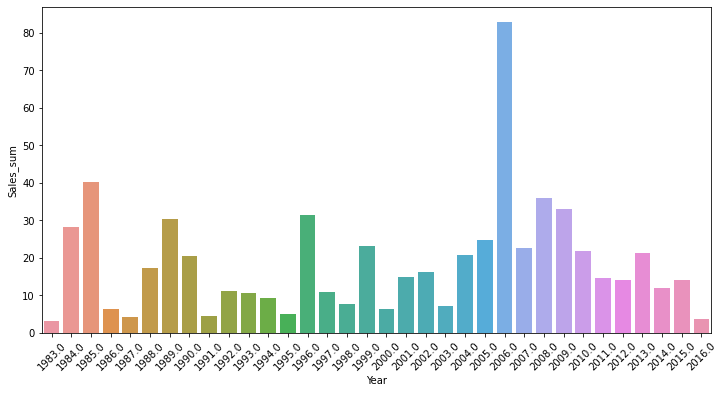

In [ ]:
#연도별 최대 매출액 시각화. (시장 성장률 확인?)
plt.subplots(figsize = (12,6))  
plt.xticks(rotation=45)
sns.barplot(data=df_Sales, x="Year", y="Sales_sum")
plt.show()

In [ ]:
#연도별 게임의 트렌드가 있을까
#df.groupby(['Year','Genre']).sum() #매출로
trend_df = pd.DataFrame(df.groupby(['Year','Genre'])['Genre'].count()) #연도,장르별 count

trend_df = trend_df.rename(columns={'Genre':'Count'})
trend_df.reset_index(inplace=True)
trend_df

,Year,Genre,Count
0,1983.0,Platform,4
1,1983.0,Sports,1
2,1984.0,Action,1
3,1984.0,Puzzle,2
4,1984.0,Racing,1
...,...,...,...
305,2016.0,Platform,2
306,2016.0,Racing,1
307,2016.0,Role-Playing,6
308,2016.0,Shooter,6


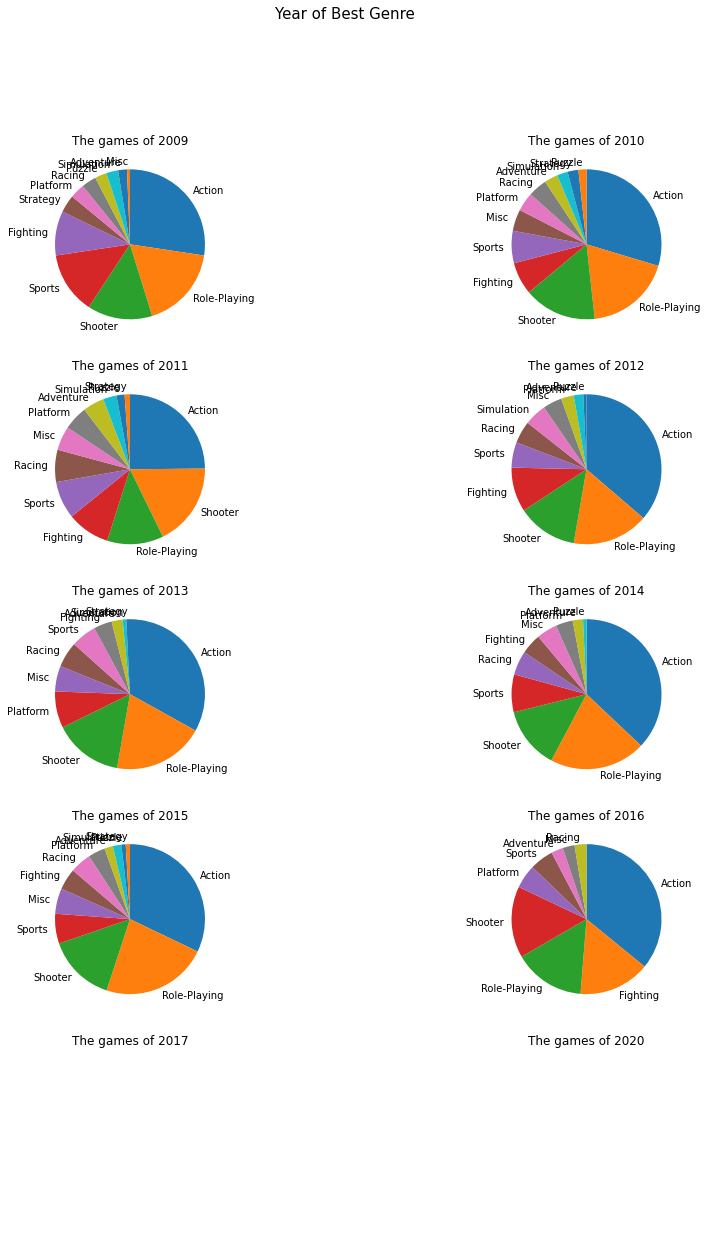

In [ ]:
#연도별 게임의 트렌드가 있을까 시각화 / 파이차트

# trend_df.loc[2010]

f, axes = plt.subplots(5, 2)
f.set_size_inches((15, 20))
#plt.subplots_adjust(wspace = 0.15, hspace = 0.15)

# figure 전체 제목
f.suptitle('Year of Best Genre', fontsize = 15)


tmp = trend_df.loc[(trend_df['Year'] == 2009),(['Genre','Count'])].sort_values('Count',ascending=False)
axes[0, 0].pie(tmp['Count'], labels=tmp['Genre'], startangle=90, counterclock=False)
axes[0, 0].set_title('The games of 2009', fontsize = 12)

tmp = trend_df.loc[(trend_df['Year'] == 2010),(['Genre','Count'])].sort_values('Count',ascending=False)
axes[0, 1].pie(tmp['Count'], labels=tmp['Genre'], startangle=90, counterclock=False)
axes[0, 1].set_title('The games of 2010', fontsize = 12)

tmp = trend_df.loc[(trend_df['Year'] == 2011),(['Genre','Count'])].sort_values('Count',ascending=False)
axes[1, 0].pie(tmp['Count'], labels=tmp['Genre'], startangle=90, counterclock=False)
axes[1, 0].set_title('The games of 2011', fontsize = 12)

tmp = trend_df.loc[(trend_df['Year'] == 2012),(['Genre','Count'])].sort_values('Count',ascending=False)
axes[1, 1].pie(tmp['Count'], labels=tmp['Genre'], startangle=90, counterclock=False)
axes[1, 1].set_title('The games of 2012', fontsize = 12)

tmp = trend_df.loc[(trend_df['Year'] == 2013),(['Genre','Count'])].sort_values('Count',ascending=False)
axes[2, 0].pie(tmp['Count'], labels=tmp['Genre'], startangle=90, counterclock=False)
axes[2, 0].set_title('The games of 2013', fontsize = 12)

tmp = trend_df.loc[(trend_df['Year'] == 2014),(['Genre','Count'])].sort_values('Count',ascending=False)
axes[2, 1].pie(tmp['Count'], labels=tmp['Genre'], startangle=90, counterclock=False)
axes[2, 1].set_title('The games of 2014', fontsize = 12)

tmp = trend_df.loc[(trend_df['Year'] == 2015),(['Genre','Count'])].sort_values('Count',ascending=False)
axes[3, 0].pie(tmp['Count'], labels=tmp['Genre'], startangle=90, counterclock=False)
axes[3, 0].set_title('The games of 2015', fontsize = 12)

tmp = trend_df.loc[(trend_df['Year'] == 2016),(['Genre','Count'])].sort_values('Count',ascending=False)
axes[3, 1].pie(tmp['Count'], labels=tmp['Genre'], startangle=90, counterclock=False)
axes[3, 1].set_title('The games of 2016', fontsize = 12)

tmp = trend_df.loc[(trend_df['Year'] == 2017),(['Genre','Count'])].sort_values('Count',ascending=False)
axes[4, 0].pie(tmp['Count'], labels=tmp['Genre'], startangle=90, counterclock=False)
axes[4, 0].set_title('The games of 2017', fontsize = 12)

tmp = trend_df.loc[(trend_df['Year'] == 2020),(['Genre','Count'])].sort_values('Count',ascending=False)
axes[4, 1].pie(tmp['Count'], labels=tmp['Genre'], startangle=90, counterclock=False)
axes[4, 1].set_title('The games of 2020', fontsize = 12)

plt.show()

In [ ]:
#1. 지역에 따라서 선호하는 게임의 장르가 다른가?
df_NA = df.loc[df.groupby(['Year'])['NA_Sales'].idxmax()].reset_index(drop=True)
df_EU = df.loc[df.groupby(['Year'])['EU_Sales'].idxmax()].reset_index(drop=True)
df_JP = df.loc[df.groupby(['Year'])['JP_Sales'].idxmax()].reset_index(drop=True)
df_Other = df.loc[df.groupby(['Year'])['Other_Sales'].idxmax()].reset_index(drop=True)

#각 연도별+국가 최대 매출 금액. 연도별로.
#고로 df 하나 만들어서 데이터 각 쌓아서 시각화.

In [ ]:
#2000년대 이후 NA에서 매출 1위를 달성한 장르
# df_NA = df_NA.loc[(df_NA.Year > 2000)]
# df_NA = pd.DataFrame(df_NA.groupby(['Genre'])['Genre'].count())
# df_NA = df_NA.rename(columns={'Genre':'Count'})
# df_NA.reset_index(inplace=True)
# df_NA

def df_Set(t_df):
    t_df = t_df.loc[(t_df.Year > 2000)]
    t_df = pd.DataFrame(t_df.groupby(['Genre'])['Genre'].count())
    t_df = t_df.rename(columns={'Genre':'Count'})
    t_df.reset_index(inplace=True)
    t_df.sort_values('Count',ascending=False, inplace=True)
    print(t_df)
    return t_df

df_NA = df_Set(df_NA)
df_EU = df_Set(df_EU)
df_JP = df_Set(df_JP)
df_Other = df_Set(df_Other)


          Genre  Count
0        Action      4
4       Shooter      4
2        Racing      3
5        Sports      3
1          Misc      1
3  Role-Playing      1
        Genre  Count
6      Sports      4
0      Action      3
3      Racing      3
4     Shooter      3
1        Misc      1
2    Platform      1
5  Simulation      1
          Genre  Count
3  Role-Playing      7
4    Simulation      3
0        Action      2
1      Platform      2
2        Racing      1
5        Sports      1
        Genre  Count
0      Action      5
2     Shooter      4
1      Racing      3
4      Sports      3
3  Simulation      1


Text(0.5, 1.0, 'Country Other')

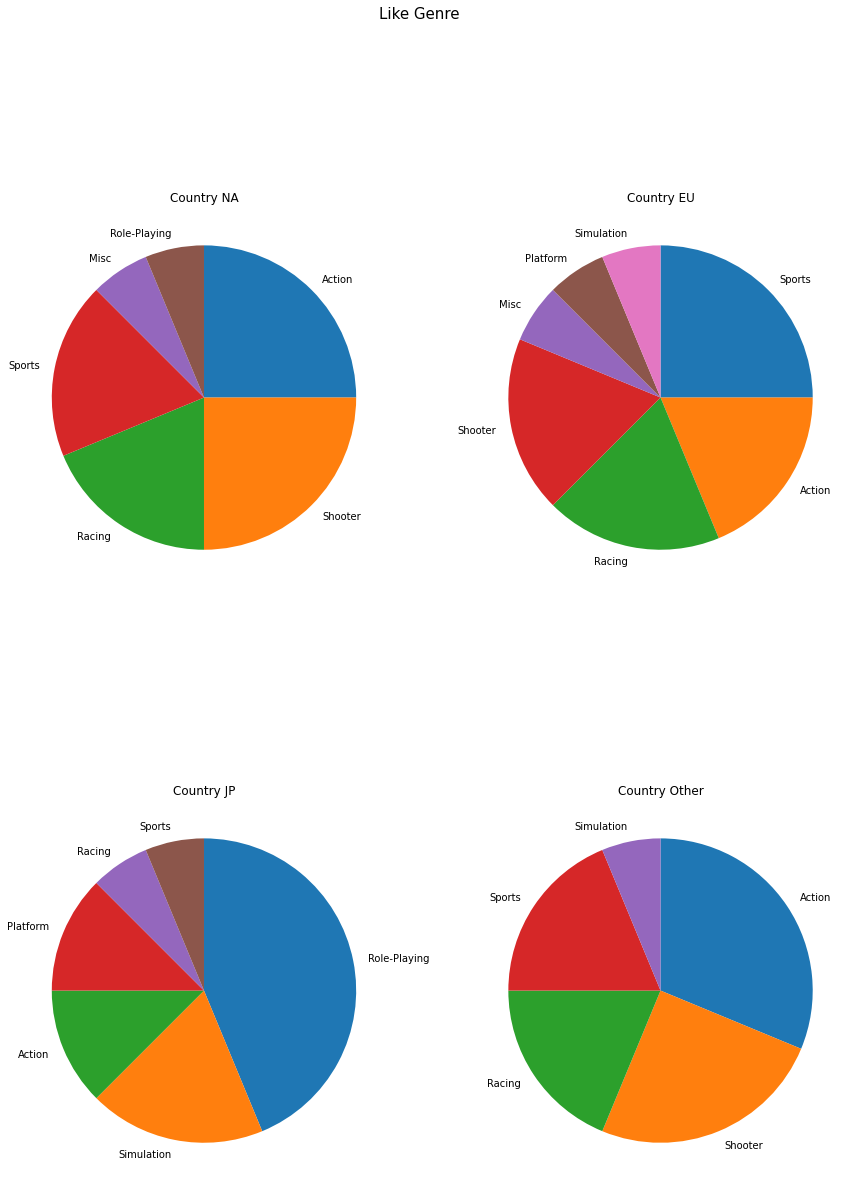

In [ ]:
#1. 지역에 따라서 선호하는 게임의 장르가 다른가? 시각화
f, axes = plt.subplots(2, 2)
f.set_size_inches((15, 20))
#plt.subplots_adjust(wspace = 0.15, hspace = 0.15)

# figure 전체 제목
f.suptitle('Like Genre', fontsize = 15)

axes[0, 0].pie(df_NA['Count'], labels=df_NA['Genre'], startangle=90, counterclock=False)
axes[0, 0].set_title('Country NA', fontsize = 12)

axes[0, 1].pie(df_EU['Count'], labels=df_EU['Genre'], startangle=90, counterclock=False)
axes[0, 1].set_title('Country EU', fontsize = 12)

axes[1, 0].pie(df_JP['Count'], labels=df_JP['Genre'], startangle=90, counterclock=False)
axes[1, 0].set_title('Country JP', fontsize = 12)

axes[1, 1].pie(df_Other['Count'], labels=df_Other['Genre'], startangle=90, counterclock=False)
axes[1, 1].set_title('Country Other', fontsize = 12)

In [ ]:
#3. 출고량 높은 게임에 대한 분석 및 프로세스
#이게 문제넹..
#연도에 따른, 플랫폼의 대세에 따른, 장르의 대세에 따른.
#퍼블리셔의 역량

#1. 연도별 총 출고량 1위에서 장르, 퍼블리셔, 플랫폼 count해서 순위 (df_Sales)

#직전 10년간의 데이터
#2. 직전 10년간 가장 인기 많았던 장르부터 순위별로. (장르의 대세, df)
#3. EDA한 값로 직전 10년간 플랫폼의 대세 뽑기. (연도의 대세 + 플랫폼의 대세, df)
#4. EDA한 값으로 퍼블리셔 순위 (df)
#5. '관련성'. 클러스터링 등.
#이 데이터들을 종합한 정보로 분석





#시각화
#데이터를 검증
#결론도출

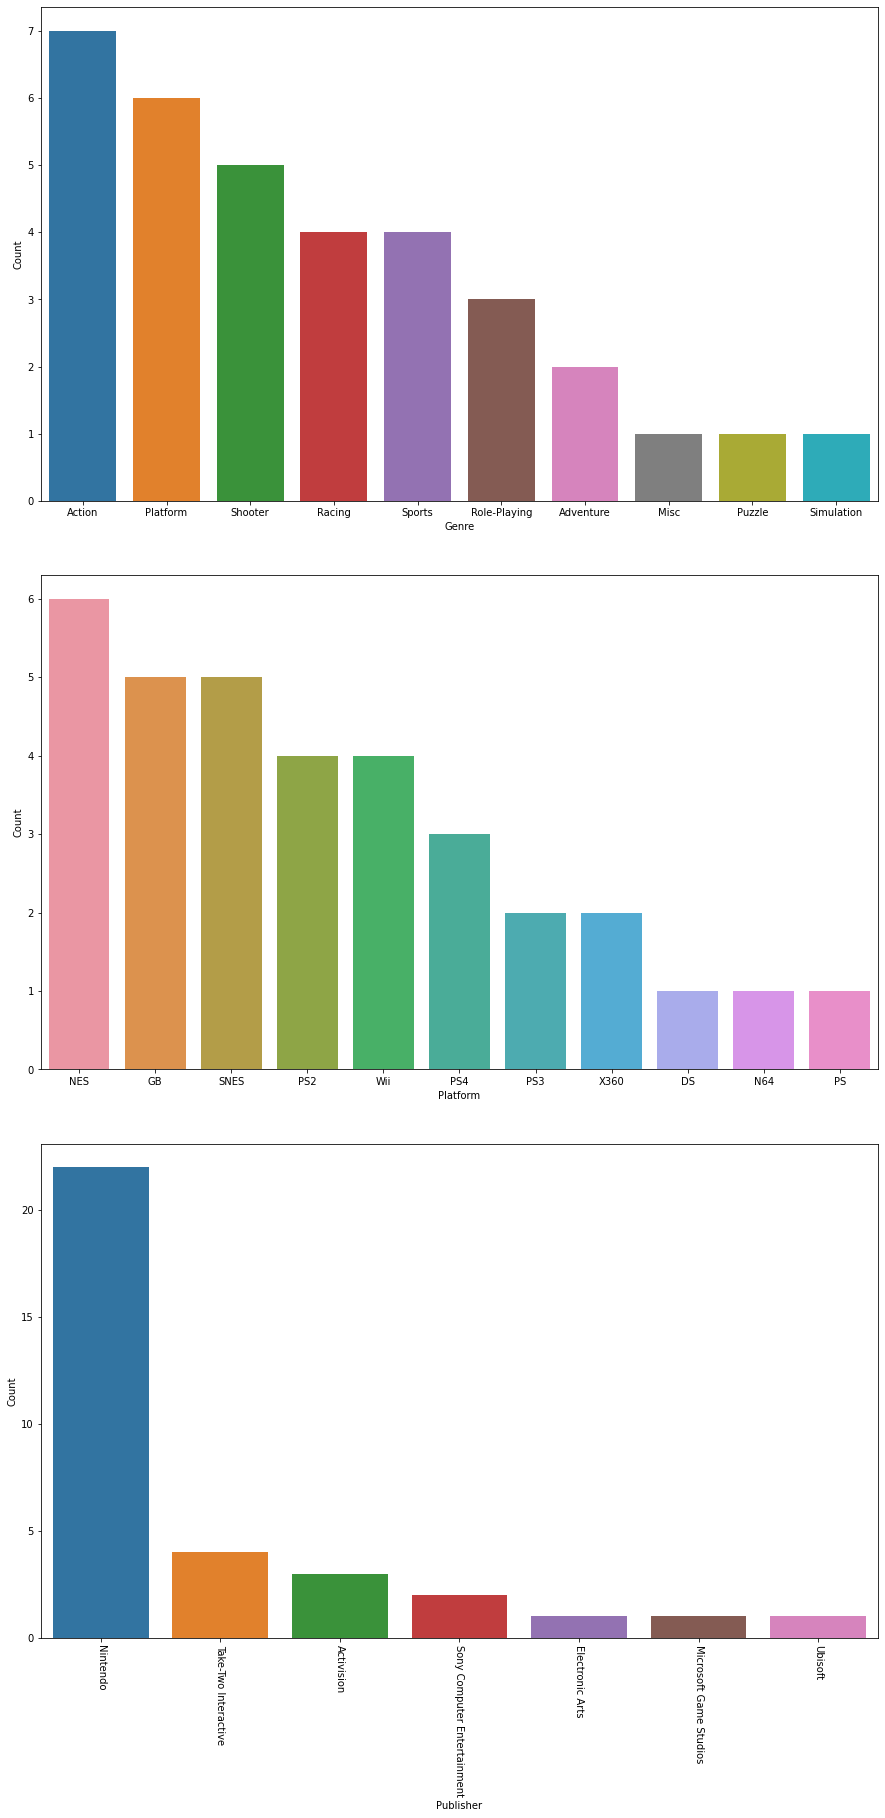

In [ ]:
#시각화/바차트
#연도별 최고 매출 게임 -> 장르, 퍼블리셔, 플랫폼

plt.figure(figsize=(15,30))
plt.subplots_adjust(wspace = 0, hspace = 0.15)

#1980년대 이후, 연도별 출고량 1위에서, 장르별 1위 횟수.
#rank_genre
rank_genre = pd.DataFrame(df_Sales.groupby(['Genre'])['Genre'].count().reset_index(name='Count'))
rank_genre.sort_values('Count',ascending=False, inplace=True)
plt.subplot(3,1,1)
sns.barplot(data=rank_genre, x="Genre", y="Count")




#1980년대 이후, 연도별 출고량 1위를 달성했던 플랫폼 명
rank_platform = pd.DataFrame(df_Sales.groupby(['Platform'])['Platform'].count().reset_index(name='Count'))
rank_platform.sort_values('Count',ascending=False, inplace=True)

# rank_platform.plot.bar(x='Platform',y='Count',rot=0)
plt.subplot(3,1,2)
sns.barplot(data=rank_platform, x="Platform", y="Count")


#1980년대 이후, 연도별 출고량 1위를 가장 많이 한 퍼블리셔
rank_pub = pd.DataFrame(df_Sales.groupby(['Publisher'])['Publisher'].count().reset_index(name='Count'))
rank_pub.sort_values('Count',ascending=False, inplace=True)
plt.subplot(3,1,3)
plt.xticks(rotation=270)
sns.barplot(data=rank_pub, x="Publisher", y="Count")

plt.show()

#유의미한 데이터
#퍼블리셔 순위

In [ ]:
ten_years_df = df.loc[df.Year > 2010]

#2. 직전 10년간 가장 많이 출시된 장르부터 순위별로. (장르의 대세, df)
ten_genre = pd.DataFrame(ten_years_df.groupby(['Genre'])['Genre'].count().reset_index(name='Count'))
ten_genre.sort_values('Count',ascending=False, inplace=True)
ten_genre.reset_index(drop=True, inplace=True)

#직전 10년간 출시 플랫폼의 수
ten_platform = pd.DataFrame(ten_years_df.groupby(['Platform'])['Platform'].count().reset_index(name='Count'))
ten_platform.sort_values('Count',ascending=False, inplace=True)
ten_platform.reset_index(drop=True, inplace=True)

#직전 10년간 퍼블리싱을 맡은 회사 수
ten_publisher = pd.DataFrame(ten_years_df.groupby(['Publisher'])['Publisher'].count().reset_index(name='Count'))
ten_publisher.sort_values('Count',ascending=False, inplace=True)
ten_publisher.reset_index(drop=True, inplace=True)
#ten_publisher_df = ten_publisher_df.rename(columns={'Publisher':'Count'})
#ten_publisher_df.reset_index(inplace=True)

#퍼블리셔 데이터가 너무 많아서 상위 10위권만.
ten_publisher = ten_publisher.loc[:10]

# ten_genre ten_platform ten_publisher

#유의미한 데이터
#장르의 대세,
#플랫폼

In [ ]:
ten_publisher = ten_publisher.loc[:10]

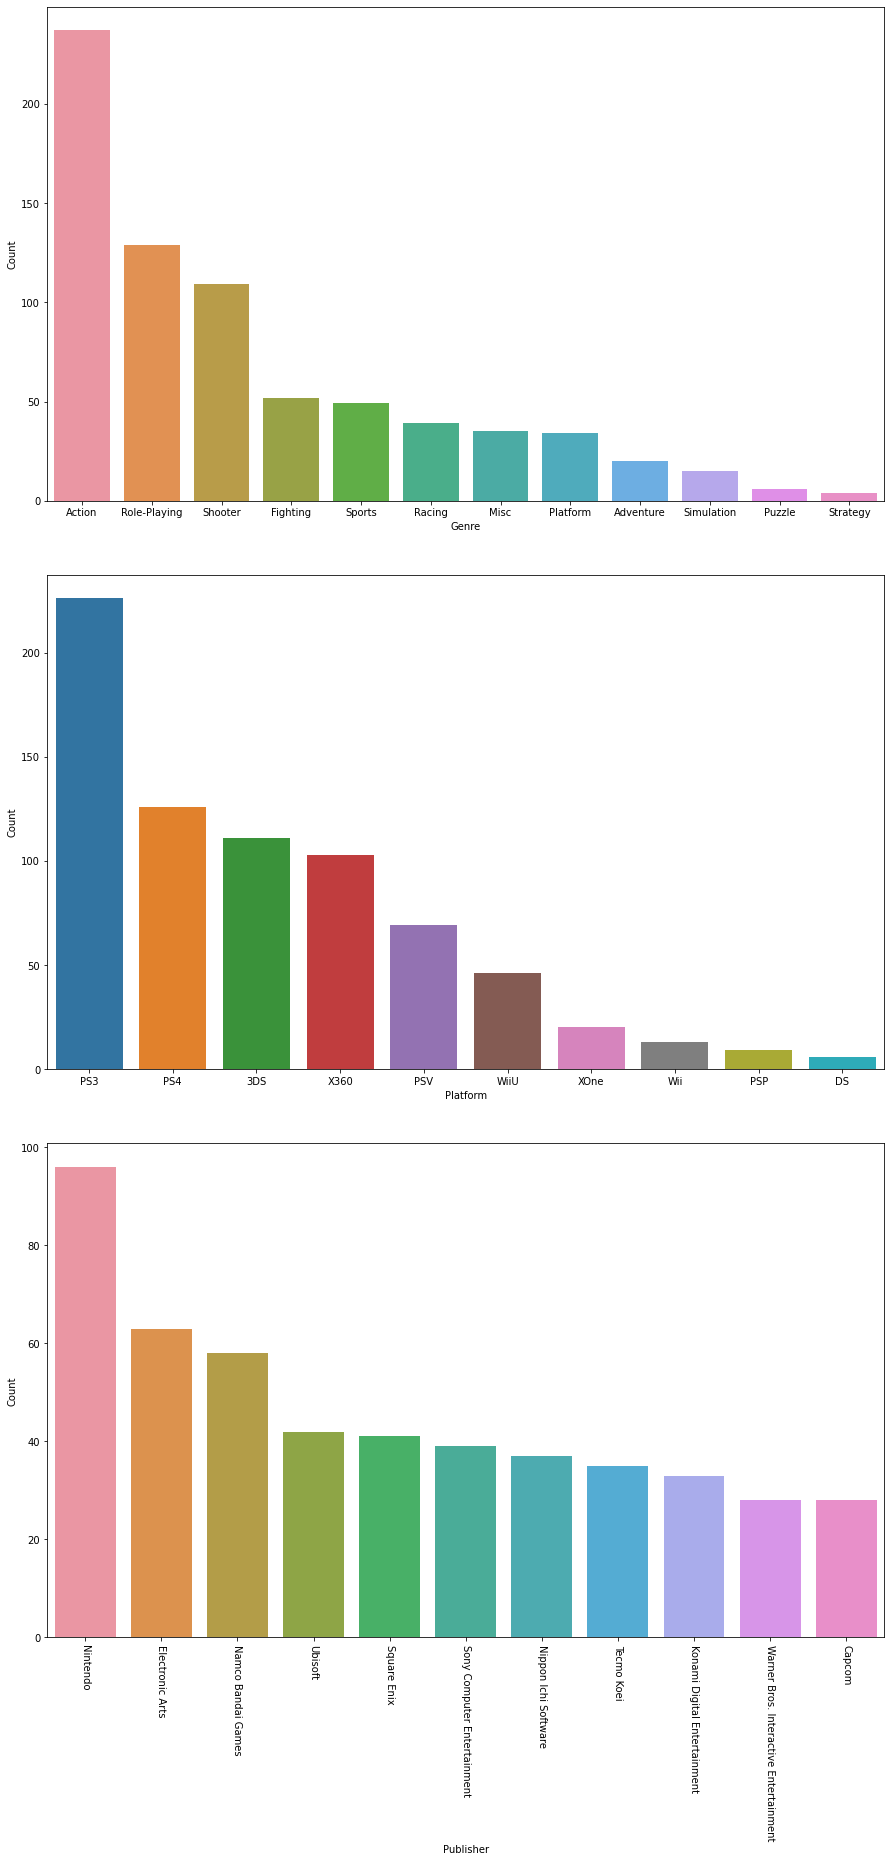

In [ ]:
#최근 10년간 데이터 시각화

# ten_genre ten_platform ten_publisher

plt.figure(figsize=(15,30))
plt.subplots_adjust(wspace = 0, hspace = 0.15)

#최근 10년간 게임의 장르
plt.subplot(3,1,1)
sns.barplot(data=ten_genre, x="Genre", y="Count")

#최근 10년간 출시된 게임들의 플랫폼
plt.subplot(3,1,2)
sns.barplot(data=ten_platform, x="Platform", y="Count")

#최근 10년간 퍼블리싱을 가장 많이 한 곳
plt.subplot(3,1,3)
plt.xticks(rotation=270)
sns.barplot(data=ten_publisher, x="Publisher", y="Count")


plt.show()

In [ ]:
#5. '관련성'. 클러스터링 등. -> 스캐터플롯
#이 데이터들을 종합한 정보로 분석

In [ ]:
#최근 2013~2016년간의 장르 군집화

In [ ]:
c_df = df.loc[(df.Year > 2012) & (df.Year <2022)]
#c_df = df.loc[(df.Year > 2012) & (df.Year <2017)]
c_df.reset_index(drop=True, inplace=True)
c_df = c_df[['Name','Platform','Year','Genre','Publisher','Sales_sum']]
c_df

,Name,Platform,Year,Genre,Publisher,Sales_sum
0,God of War: Ascension,PS3,2013.0,Action,Sony Computer Entertainment,2.29
1,Need for Speed Rivals,PS3,2013.0,Racing,Electronic Arts,1.43
2,Pikmin 3,WiiU,2013.0,Strategy,Nintendo,1.11
3,Metro: Last Light,PS3,2013.0,Action,Deep Silver,0.45
4,Army of Two: The Devil's Cartel,PS3,2013.0,Shooter,Electronic Arts,0.28
...,...,...,...,...,...,...
405,Odin Sphere: Leifthrasir,PSV,2016.0,Role-Playing,Nippon Ichi Software,0.15
406,FIFA 17,PS3,2016.0,Sports,Electronic Arts,0.37
407,Kirby: Planet Robobot,3DS,2016.0,Action,Nintendo,0.84
408,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.45


In [ ]:
c_df.Sales_sum.describe()

count    410.000000
mean       1.408561
std        2.131879
min        0.060000
25%        0.290000
50%        0.680000
75%        1.625000
max       21.390000
Name: Sales_sum, dtype: float64

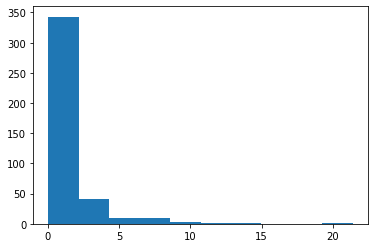

In [ ]:
plt.hist(c_df.Sales_sum);

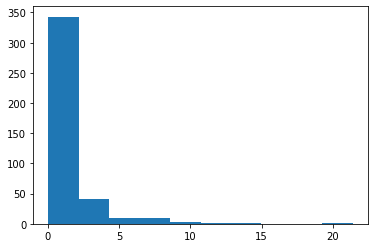

In [ ]:
plt.hist(c_df.Sales_sum[c_df.Sales_sum < 200]);

In [ ]:
less_250 = c_df[c_df.Sales_sum < 250]
larger_250 = c_df[c_df.Sales_sum >= 250]
len(less_250), len(larger_250)

(410, 0)

In [ ]:
len(larger_250) / len(less_250)

0.0

In [ ]:
c_df = c_df.drop(index = c_df[c_df.Sales_sum >= 250].index)

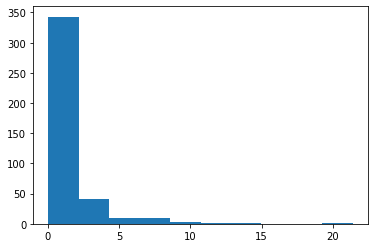

In [ ]:
plt.hist(c_df.Sales_sum);

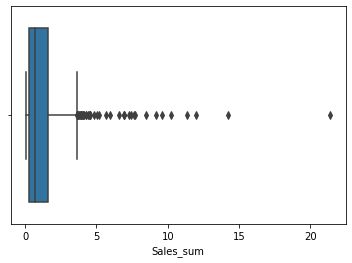

In [ ]:
# outlier를 제거한 데이터 시각화
sns.boxplot(x=c_df.Sales_sum);

In [ ]:
c_df = c_df.drop(index = c_df[c_df.Sales_sum >= 8].index)

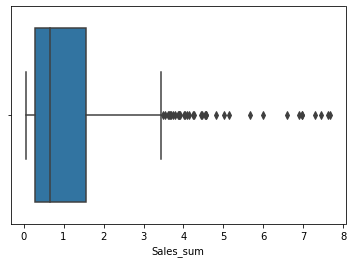

In [ ]:
# outlier를 한번더 제거한 데이터 시각화
sns.boxplot(x=c_df.Sales_sum);

In [ ]:
c_df.Sales_sum.describe()

count    402.000000
mean       1.196716
std        1.422503
min        0.060000
25%        0.290000
50%        0.660000
75%        1.557500
max        7.670000
Name: Sales_sum, dtype: float64

In [ ]:
#! pip install sklearn

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
X = c_df[['Platform','Year','Genre','Sales_sum']]

#인코딩
p_encoder = LabelEncoder()
p_encoder.fit(X['Platform'])
p_labels = p_encoder.transform(X['Platform'])

#인코딩 적용
X['Platform'] = p_encoder.transform(X['Platform'])


#인코딩
g_encoder = LabelEncoder()
g_encoder.fit(X['Genre'])
g_labels = g_encoder.transform(X['Genre'])

#인코딩 적용
X['Genre'] = g_encoder.transform(X['Genre'])


print('Platform 인코딩 변환값:',p_labels)
print('Platform 인코딩 클래스:',p_encoder.classes_)

print('Genre 인코딩 변환값:',g_labels)
print('Genre 인코딩 클래스:',g_encoder.classes_)


Platform 인코딩 변환값: [1 1 4 1 1 1 1 1 0 0 4 0 3 1 3 1 4 4 1 1 0 1 3 5 1 1 1 1 1 4 5 1 3 1 3 1 5
 1 1 6 1 1 0 2 4 1 1 4 0 1 1 2 1 2 5 5 1 1 4 3 0 5 1 1 3 6 0 1 1 3 4 4 1 1
 1 5 4 3 2 0 5 3 1 1 1 1 0 0 1 3 4 3 2 1 1 2 1 5 5 0 2 5 3 3 4 5 0 3 1 4 3
 1 0 2 2 5 1 5 1 5 5 4 5 2 3 3 2 3 1 2 2 0 1 1 3 3 0 1 1 1 5 2 0 2 0 2 1 2
 1 1 2 1 5 3 2 6 2 2 2 5 1 1 2 4 3 3 3 2 6 6 2 1 1 2 0 1 4 1 1 1 2 2 2 3 1
 1 6 5 2 1 2 4 1 2 3 0 1 3 1 2 5 3 2 6 3 2 1 2 2 3 3 1 2 2 2 1 0 1 3 1 1 2
 0 5 1 1 2 1 2 4 0 2 3 4 3 0 2 1 3 2 4 2 6 3 1 2 4 5 2 1 2 4 2 0 1 0 0 6 6
 2 2 2 2 1 0 2 0 2 2 2 2 2 3 0 4 2 2 6 2 3 0 4 2 2 1 6 2 6 3 2 6 2 0 2 4 1
 2 0 0 4 1 1 2 3 0 4 2 1 0 2 1 2 2 0 0 2 3 2 2 0 2 4 1 0 6 2 4 2 0 2 2 2 0
 2 0 6 2 0 2 6 2 2 0 2 1 2 2 4 6 4 2 2 0 3 2 4 2 0 2 2 6 1 0 2 2 4 3 4 2 6
 2 2 2 4 2 0 2 2 2 2 2 4 2 2 2 0 2 4 2 2 2 2 1 2 2 2 1 3 1 0 0 2]
Platform 인코딩 클래스: ['3DS' 'PS3' 'PS4' 'PSV' 'WiiU' 'X360' 'XOne']
Genre 인코딩 변환값: [ 0  6 11  0  8  0  6  7  0  0  0  4  7  0  7  7  4 10  0  0  9  2  0  0
  0  2  7  8 

C:\Users\Jacob\AppData\Local\Temp\ipykernel_2972\2105196388.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Platform'] = p_encoder.transform(X['Platform'])
C:\Users\Jacob\AppData\Local\Temp\ipykernel_2972\2105196388.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Genre'] = g_encoder.transform(X['Genre'])


In [ ]:
X #인코딩 적용된 데이터 확인

,Platform,Year,Genre,Sales_sum
0,1,2013.0,0,2.29
1,1,2013.0,6,1.43
2,4,2013.0,11,1.11
3,1,2013.0,0,0.45
4,1,2013.0,8,0.28
...,...,...,...,...
405,3,2016.0,7,0.15
406,1,2016.0,10,0.37
407,0,2016.0,0,0.84
408,0,2016.0,0,0.45


In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(X)

In [ ]:
print(rfm_scaled)
print('mean: ', rfm_scaled.mean(axis=0).round(2))
print('std: ', rfm_scaled.std(axis=0).round(2))

[[-0.73226306 -1.19277447 -1.14526058  0.76952079]
 [-0.73226306 -1.19277447  0.51681434  0.16419945]
 [ 1.1427035  -1.19277447  1.90187677 -0.06103639]
 ...
 [-1.35725191  1.9074109  -1.14526058 -0.25107914]
 [-1.35725191  1.9074109  -1.14526058 -0.52558533]
 [-0.10727421  1.9074109  -0.5912356  -0.63820325]]
mean:  [ 0.  0.  0. -0.]
std:  [1. 1. 1. 1.]


In [ ]:
sse = {}

for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_

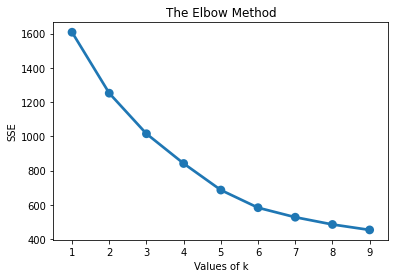

In [ ]:
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=50).fit(rfm_scaled)
cluster_labels = kmeans.labels_
rfm = X.assign(Cluster = cluster_labels)

In [ ]:
#kmeans.labels_
#rfm.head()
rfm.Cluster.unique()

array([0, 2, 3, 1])

In [ ]:
#디코딩하기전에 그룹 평균값 출력
cluster_avg = rfm.groupby(['Cluster']).mean()
cluster_avg

,Platform,Year,Genre,Sales_sum
Cluster,,,,
0,1.456376,2014.302013,0.724832,0.787047
1,2.222222,2014.027778,5.666667,4.890000
2,1.643836,2014.178082,7.568493,0.789384
3,4.732394,2013.859155,3.450704,1.021408


In [ ]:
#인코딩한거 디코딩
rfm['Platform'] = p_encoder.inverse_transform(rfm['Platform'])
rfm['Genre'] = g_encoder.inverse_transform(rfm['Genre'])
rfm

,Platform,Year,Genre,Sales_sum,Cluster
0,PS3,2013.0,Action,2.29,0
1,PS3,2013.0,Racing,1.43,2
2,WiiU,2013.0,Strategy,1.11,2
3,PS3,2013.0,Action,0.45,0
4,PS3,2013.0,Shooter,0.28,2
...,...,...,...,...,...
405,PSV,2016.0,Role-Playing,0.15,2
406,PS3,2016.0,Sports,0.37,2
407,3DS,2016.0,Action,0.84,0
408,3DS,2016.0,Action,0.45,0


In [ ]:
cluster_0 = rfm[rfm.Cluster == 0]
cluster_1 = rfm[rfm.Cluster == 1]
cluster_2 = rfm[rfm.Cluster == 2]
cluster_2 = rfm[rfm.Cluster == 3]
rfm

,Platform,Year,Genre,Sales_sum,Cluster
0,PS3,2013.0,Action,2.29,0
1,PS3,2013.0,Racing,1.43,2
2,WiiU,2013.0,Strategy,1.11,2
3,PS3,2013.0,Action,0.45,0
4,PS3,2013.0,Shooter,0.28,2
...,...,...,...,...,...
405,PSV,2016.0,Role-Playing,0.15,2
406,PS3,2016.0,Sports,0.37,2
407,3DS,2016.0,Action,0.84,0
408,3DS,2016.0,Action,0.45,0


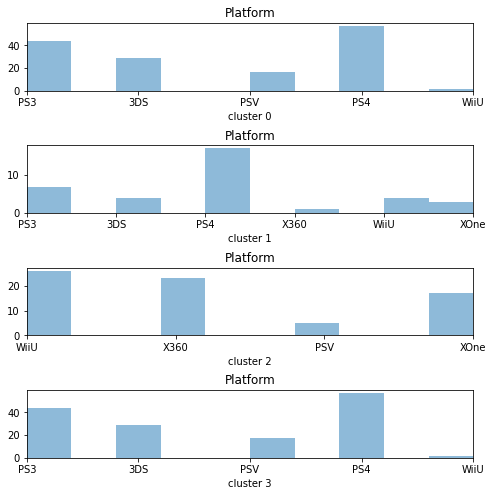

In [ ]:
var = [cluster_0.Platform, cluster_1.Platform, cluster_2.Platform, cluster_0.Platform]
cluster = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3']

fig, ax = plt.subplots(4,1, figsize=[8,8])

for i in range(len(var)):
    variable= var[i]
    ax[i].hist(variable, alpha=0.5)
    ax[i].set_xlim(0, var[i].max())
    ax[i].set_xlabel(f'{cluster[i]}')
    ax[i].set_title('Platform')

plt.subplots_adjust(hspace=0.8)

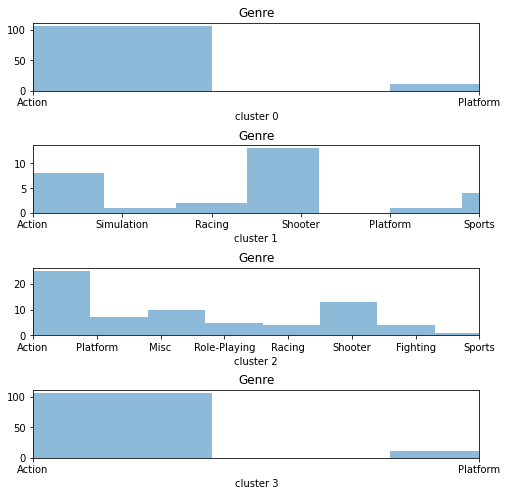

In [ ]:
var = [cluster_0.Genre, cluster_1.Genre, cluster_2.Genre, cluster_0.Genre]
cluster = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3']

fig, ax = plt.subplots(4,1, figsize=[8,8])

for i in range(len(var)):
    variable= var[i]
    ax[i].hist(variable, alpha=0.5)
    ax[i].set_xlim(0, var[i].max())
    ax[i].set_xlabel(f'{cluster[i]}')
    ax[i].set_title('Genre')

plt.subplots_adjust(hspace=0.8)